## Prevenir el Overfitting: Regularización

### Dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

Vamos a usar el MINST dataset, que cosnsite en una colección de imagenes de 28x28 pixeles correspondiente a digitos del 0 al 9 manuscritos. El proposito de este dataset es enternar modelos que reconocen la escritura de numeros a mano.

Vamos a entrenar un modelo OCR(Optical Character Recognition) para clasificatción multiclase (numeros del 0 al 9)

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Pixeles del elemento 0 del conjunto X_train
X_train[0].shape

(28, 28)

Como son imagenes de 8-bit, los colores de cada pixel estan codificados con valores entre 0 y 2055, siendo 0 negro y 255 blanco. Es usual normalizar los valores para trabajar con rangos entre 0,0 y 1.0

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalziación de los datos entre 0 y 1

Visualizamos una imagen random del training set.

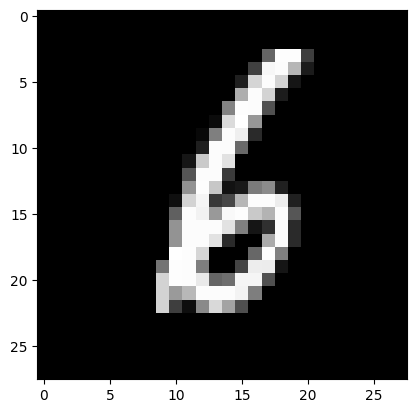

In [ ]:
import numpy as np

i = np.random.randint(0,len(X_train))
plt.imshow(X_train[i], cmap='gray')

Vamos a reducir el modelo para inducir a overfitting

In [ ]:
from sklearn.model_selection import train_test_split
# Split into train test sets
_, X, _, y = train_test_split(
    X_train, y_train, test_size=0.02, random_state=1, stratify=y_train)

num_classes = 10
from collections import Counter
X.shape, y.shape, Counter(y) # Counter(y) Sirve para ver la distribución del target (y) para saber como se balancean las clases

((1200, 28, 28),
 (1200,),
 Counter({np.uint8(2): 119,
          np.uint8(8): 117,
          np.uint8(6): 118,
          np.uint8(9): 119,
          np.uint8(3): 123,
          np.uint8(4): 117,
          np.uint8(0): 119,
          np.uint8(7): 125,
          np.uint8(5): 108,
          np.uint8(1): 135}))

Para que necesitamos regularización?

Vamos a asignar las clases de forma aleatoria para cada imagen con `random_shuffle`

In [ ]:
y_shuffle = np.copy(y) # hace una copia de y y la nomina y_shuffle
np.random.shuffle(y_shuffle) # hacemos un shuffle para y, es decir, barajar de forma aleatoria los elementos del array.
y[:5], y_shuffle[:5] # para comparar ambos targets

(array([2, 8, 6, 9, 3], dtype=uint8), array([9, 6, 7, 8, 8], dtype=uint8))

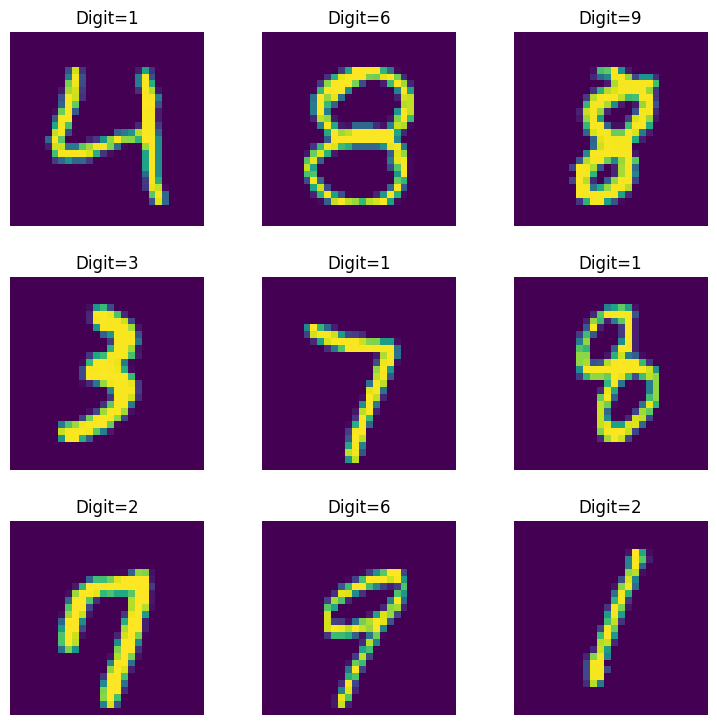

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(9,9)) # establecemos las dimensiones del grafico con subplots
axes = axes.ravel() # adaptaos los axis al grafico

for i in np.arange(0,9): # creacion de bucle for para aplicar una etiqueta aleatoria a cada imagen entre 0-9
  ind = np.random.randint(len(y_shuffle)) # variable ind que pilla un numero random en el len(y_shuffle)
  axes[i].imshow(X[ind].reshape(28,28)) # ploteamos la imagen seleccionada en ind dentro del dataset X
  axes[i].set_title(f'Digit={y_shuffle[ind]}') # le asignamos un title (etiqueta)
  axes[i].axis('off')

  plt.subplots_adjust(wspace=0.3)

### Modelo con los datos de y erroneos

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28))
# Convertirmos las imagenes 2D en vectores
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(64, activation='relu')(flat)
# Capa oculta 2
l_2 = layers.Dense(64, activation='relu')(l_1)
# Capa oculta 3
l_3 = layers.Dense(64, activation='relu')(l_2)

# Outputs
outputs = layers.Dense(10, activation='softmax')(l_3) # utilizamos softmax pork es un problema multiclase, sino utilizariamos sigmoid

# Definición del model
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compilación t entrenamiento del modelo
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics  =  ['accuracy'])

history = model.fit(
    X,
    y_shuffle, # entrenamos con la y aleatoria para que el modelo aprenda mal
    batch_size=64,
    epochs=100,
    shuffle=True
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1192 - loss: 2.3198
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1660 - loss: 2.2697
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2048 - loss: 2.2361
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2393 - loss: 2.1963
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2878 - loss: 2.1447
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3140 - loss: 2.0833
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3519 - loss: 2.0158
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3833 - loss: 1.9421
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3923 - loss: 1.8591
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4279 - loss: 1.7764
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4657 - loss: 1.6764
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

In [ ]:
results =model.evaluate(X, y_shuffle, verbose=0)
print('Train Accuracy: {}'.format(results[1]))

Train Accuracy: 1.0


Esto es indicio de que ha salido mal el modelo, existencia de overfitting. Es lógico, pues hemos usado los datos y erroneos. Este accuracy del 1.0 nos podría confundir en nuestro modelo. El 1.0 accuracy nos indica existencia de overfitting.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


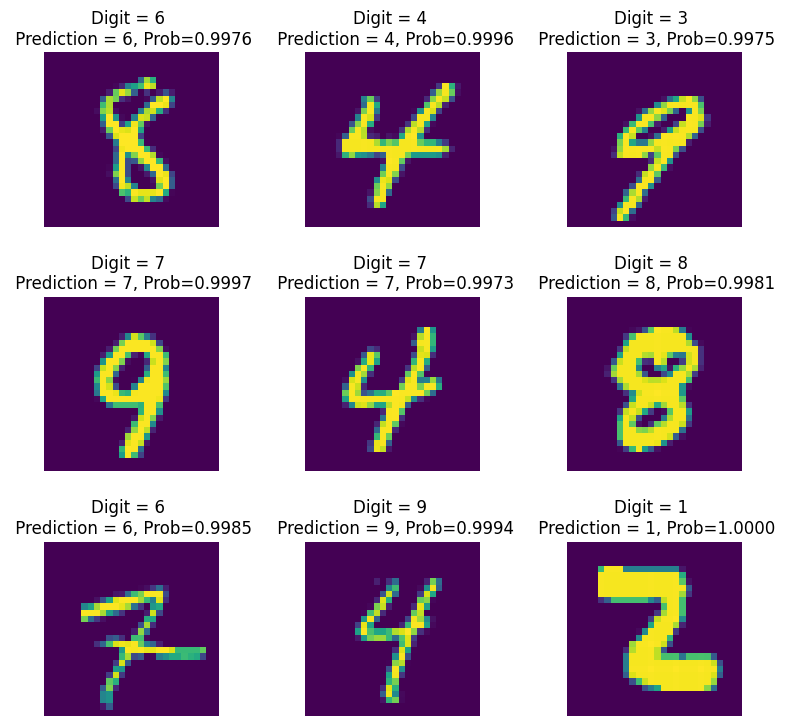

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(9,9))
axes = axes.ravel()

for i in np.arange(0, 9):
  ind = np.random.randint(len(y_shuffle))
  pred_pobs = model.predict(np.expand_dims(X[ind], 0)).flatten()
  pred_class = np.argmax(pred_pobs)
  prob = np.max(pred_pobs)
  axes[i].imshow(X[ind].reshape(28,28))
  axes[i].set_title(
      f'Digit = {y_shuffle[ind]} \n Prediction = {pred_class}, Prob={prob:.4f}')
  axes[i].axis('off')

  plt.subplots_adjust(wspace=0.5)

Vemos que, dandole etiquetas malas como al inicio (y_shuffle) el modelo dice que predice correctamente

In [ ]:
# Evaluamos el modelo sobre test
results =model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: {}'.format(results[1]))

Train Accuracy: 0.1265999972820282


Podemos ver que el modelo esta completamente encajado en el training set. Practicamente da igual que datos inroducamos en la red neuronal, que casi siemore va a encajar. El objetivo no es encajar al training set, sino <b>GENERALIZAR</b>.

### Regularización para prevenir overfitting

Para conseguir que el modelo generalice, podemos usar una serie de téncicas de regularización (que iremos viendo a continuación enumeardas). Por ahora, vamos a construir un modelo compejo, con muchos parámetros (varias capas y altos numeros de neuronas en cada capa):

Vamos a construir un modelo que consiste en:

* Input con dimension(28,28)
* capa Flatten
* Una capa oculta Dense con 256 neuronas y ReLu como función de activación
* Una segunda capa oculta Dense con 128 neuronas y ReLu como función de activación
* Una tercera capa oculta con 128 neuoras y ReLu como función de activación
* Una capa output con una sola neurona que implementa la función de activación sigmoid

Esta vez si usamos los datos y correctos.

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model')

In [ ]:
model.summary()

Model: "dont_overfit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

Definimos la siguiente configuración para el training:

* optimizer: adam
* loss function: sparse_categorical_crossentropy
* metrics:  accuracy

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3518 - loss: 2.0592 - val_accuracy: 0.7250 - val_loss: 1.0660
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7790 - loss: 0.8313 - val_accuracy: 0.8375 - val_loss: 0.5243
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8895 - loss: 0.3842 - val_accuracy: 0.8542 - val_loss: 0.4608
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9295 - loss: 0.2238 - val_accuracy: 0.8625 - val_loss: 0.5318
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9435 - loss: 0.1781 - val_accuracy: 0.8833 - val_loss: 0.4546
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9661 - loss: 0.1292 - val_accuracy: 0.8875 - val_loss: 0.3813
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9657 - loss: 0.1150 - val_accuracy: 0.8708 - val_loss: 0.4598
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9655 - loss: 0.1013 - val_accuracy: 0.

In [ ]:
results = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5502356886863708
Test Accuracy: 0.9059000015258789


Visualizamos la evolución de los valores en cada epoch de la loss function y accuracy

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
hist.head()

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.493750,1.805831,0.725000,1.066040,0
1,0.807292,0.707207,0.837500,0.524263,1
2,0.893750,0.347458,0.854167,0.460795,2
3,0.938542,0.213969,0.862500,0.531798,3
4,0.954167,0.166485,0.883333,0.454553,4


Cuando interpretamos los dos graficos, resulta evidente que el modelo tiene overfitting sobre los valores de entrenamiento y no es capaz de generalizar bien para los valores de validación.

In [ ]:
import matplotlib.pyplot as plt

def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

def show_samples(x_test, y_test, model):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, -1)

    L = 5
    W = 5
    fig, axes = plt.subplots(L, W, figsize=(14, 14))
    axes = axes.ravel()

    for i in np.arange(0, L * W):
        ind = np.random.randint(len(y_test))
        axes[i].imshow(x_test[ind].reshape(28, 28))
        prob_pred = np.max(predictions[ind, :])
        class_pred = int(predicted_classes[ind])
        original_class = int(y_test[ind])
        if class_pred == original_class:
            color = 'green'
        else:
            color = 'red'
        title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
        class_pred, original_class, prob_pred)
        axes[i].set_title(title, color=color)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

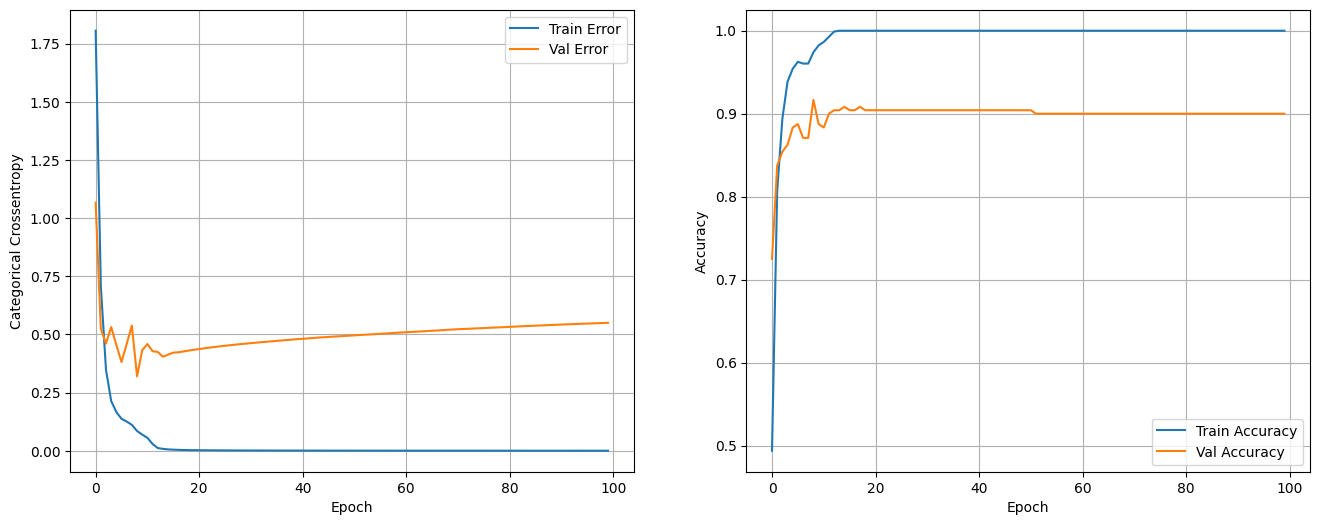

In [ ]:
show_loss_accuracy_evolution(history)

Pérdida (izquierda)

* Train loss (azul) cae casi a 0 muy pronto y se queda ahí ⇒ el modelo memoriza el conjunto de entrenamiento.
* Val loss (naranja) baja al principio (aprendizaje real) pero luego sube de forma sostenida ⇒ a partir de cierto punto, el modelo empeora en validación.

Accuracy (derecha)
* Train acc llega a ≈100%.
* Val acc se queda alrededor de ~0.89–0.91 y incluso ligeramente desciende al final.
* La brecha grande entre train y val confirma overfitting.

Posibles causas

* Modelo demasiado capaz para el tamaño/ruido del dataset.
* Pocas muestras o split poco estricto.
* Regularización insuficiente (sin dropout/weight decay).
* Demasiadas épocas (no hay early stopping).

In [ ]:

results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5502356886863708
Test Accuracy: 0.9059000015258789


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


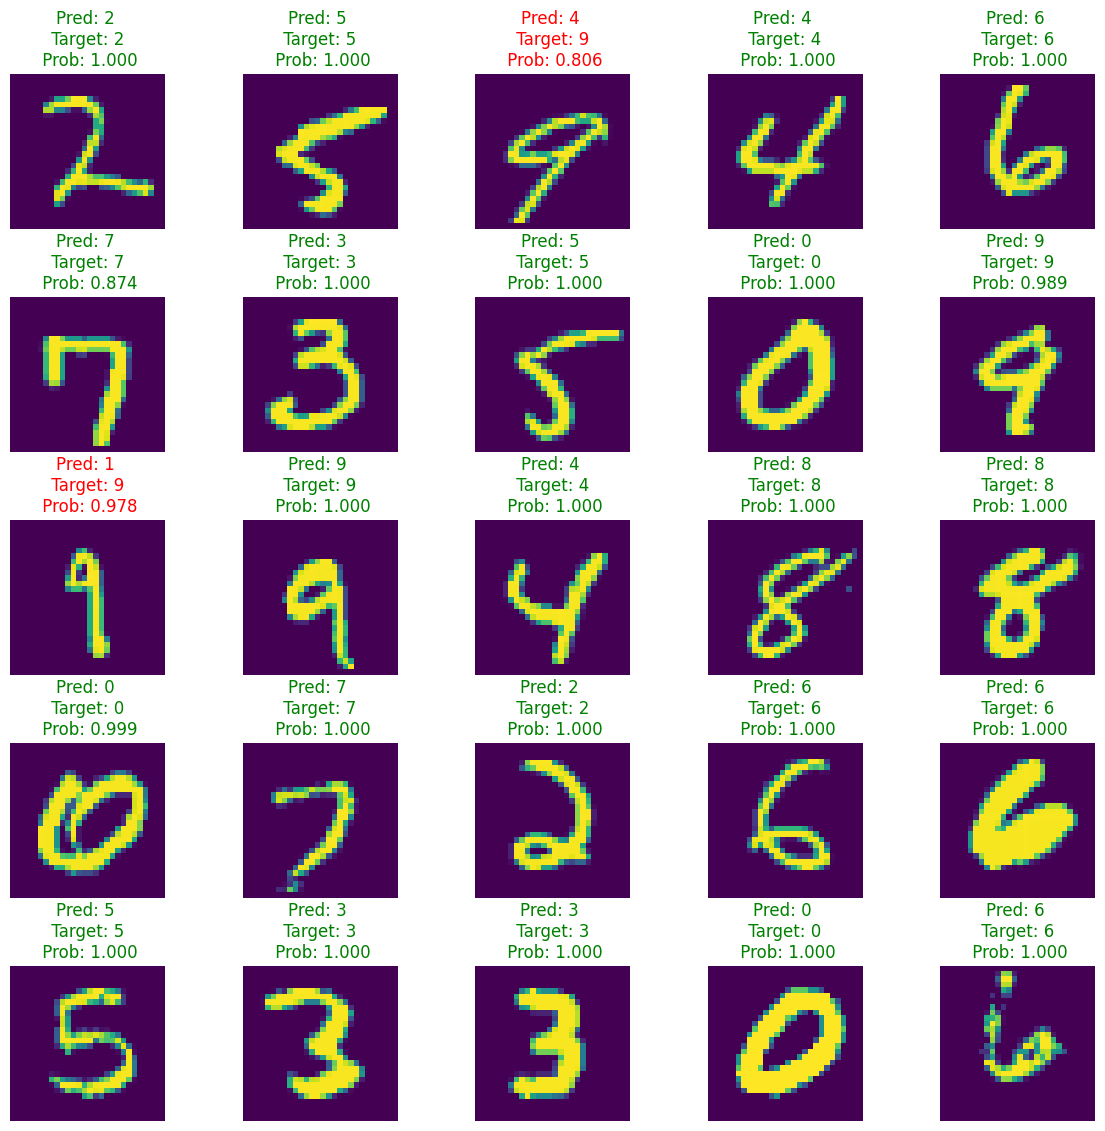

In [ ]:
show_samples(X_test, y_test, model)

### 1. Creamos un modelo mas simple

La manera más facil para prevenir el overfitting es creando un modelo simple. Un modelo con menos parámetros (que es determinado por el numero de capas y el numero de unidades por capa).

Un modelo mas complejo con más parámetros tiene más capacidad y es más capaz de aprender cualquier training set. Los modelos de Deep leraning tiende a ser buenos para encajar (fitting) con los datos de entrenamiento, pero el objetivo es la generalización, no el encaje (fit)

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(8, activation='relu', name='layer_1')(flat)
# Capa oculta 2

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_1)

# Model definition
model_simpler = keras.Model(inputs = inputs, outputs=outputs, name='simpler_model')

model_simpler.summary()

Model: "simpler_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_simpler.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history_simpler = model_simpler.fit(X,
                                    y,
                                    batch_size=64,
                                    epochs=100,
                                    validation_split=0.25,
                                    shuffle=True)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1236 - loss: 2.2631 - val_accuracy: 0.1167 - val_loss: 2.1537
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1648 - loss: 2.0793 - val_accuracy: 0.2133 - val_loss: 2.0165
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2567 - loss: 1.9318 - val_accuracy: 0.3600 - val_loss: 1.8469
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3724 - loss: 1.7651 - val_accuracy: 0.4500 - val_loss: 1.7097
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4591 - loss: 1.6369 - val_accuracy: 0.4800 - val_loss: 1.5967
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5320 - loss: 1.5264 - val_accuracy: 0.5400 - val_loss: 1.5038
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5952 - loss: 1.4276 - val_accuracy: 0.6000 - val_loss: 1.4222
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6521 - loss: 1.3386 - val_accuracy: 0.66

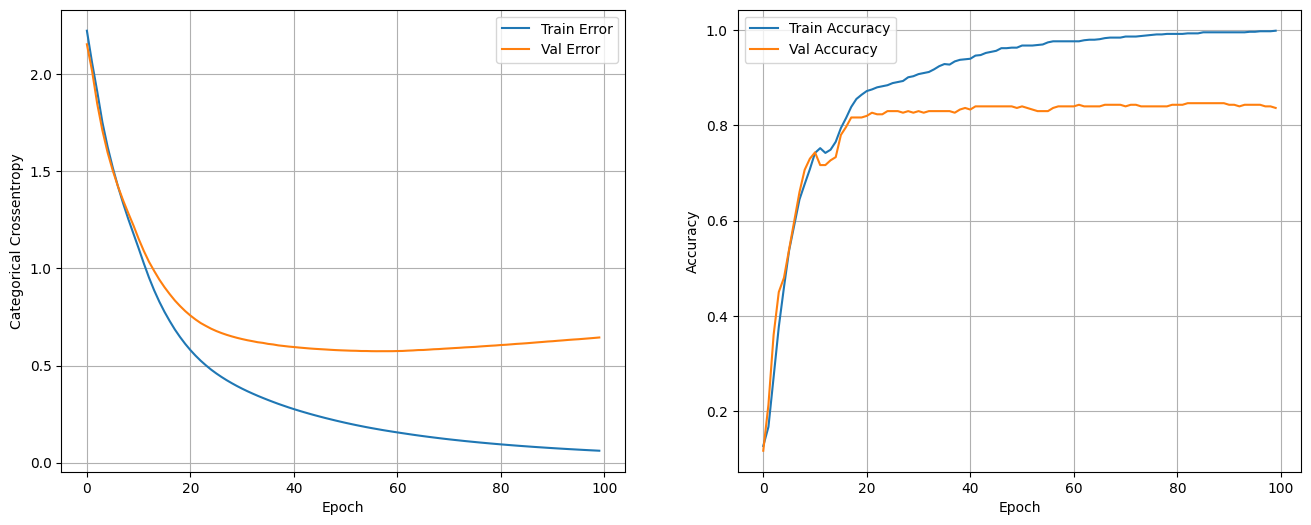

In [ ]:
show_loss_accuracy_evolution(history_simpler)

Sigue existiendo overfitting.

In [ ]:
results = model_simpler.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5834876298904419
Test Accuracy: 0.8507999777793884


### 2. Reducir el batch_size

Otro metodo es reducir el `batch_size` durante la gradiente descendente para añadir más incertidumbre a la estimación del parametro gradiente, reduciendo la capacidad del modelo.

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model')

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4767 - loss: 1.6357 - val_accuracy: 0.8583 - val_loss: 0.5050
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8718 - loss: 0.4005 - val_accuracy: 0.8917 - val_loss: 0.4020
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9186 - loss: 0.2270 - val_accuracy: 0.9125 - val_loss: 0.3572
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9600 - loss: 0.1241 - val_accuracy: 0.8875 - val_loss: 0.3821
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9835 - loss: 0.0651 - val_accuracy: 0.9000 - val_loss: 0.4009
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9792 - loss: 0.0636 - val_accuracy: 0.9000 - val_loss: 0.4170
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9916 - loss: 0.0424 - val_accuracy: 0.9042 - val_loss: 0.3991
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.9042 - 

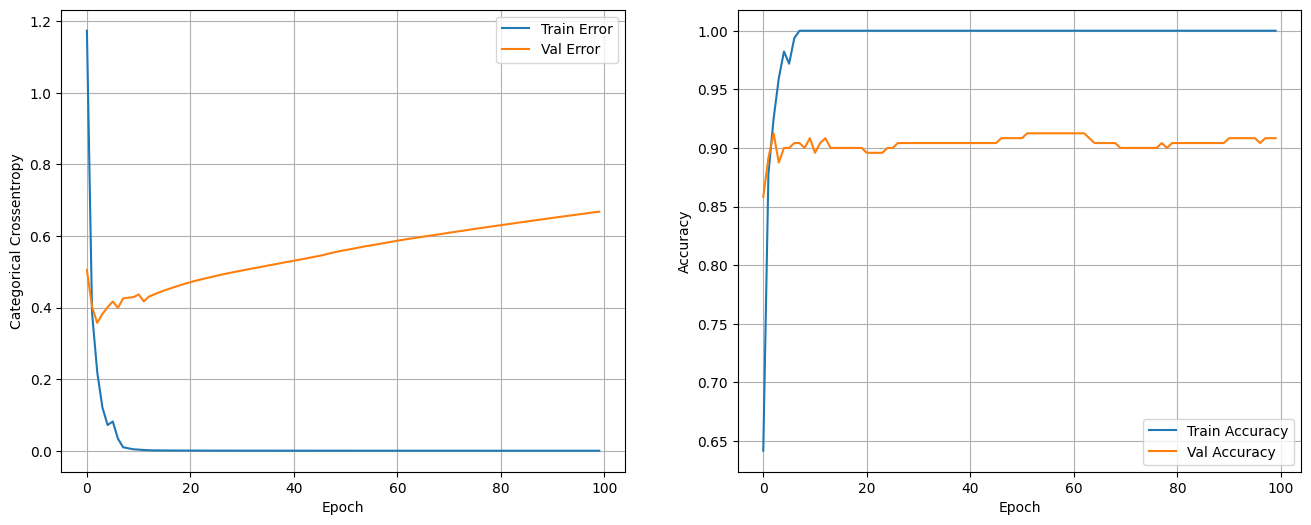

In [ ]:
show_loss_accuracy_evolution(history)

In [ ]:
results = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.6466258764266968
Test Accuracy: 0.9106000065803528


Cuando reducimos el batch_size estamos simplificando el modelo, por lo que ayuda al modelo a no tener overfitting, en cambio, si incrementamos el batch_size estamos haciendo que el modelo sea más capaz, pero tiende mas a sobreaprender (overfitting)

### 3. DropOut

El Dropout aplicado a una capa, consiste en apagar aleatrioamente (poner a cero) cierta cantidad de características de salida de esa capa durante el entrenamiento con una probabilidad p (tasa de dropout).

En Keras puedes introducir dropout en una red mediante la capa `Dropout`, que se aplica a la salida de la capa inmediatamente anterior.

```python
tf.keras.Dropout(rate, noise_shape=None, seed=None, **kwargs)
```

Con Functional API
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
Con Sequential:
```python
model.add(layers.Dropout(0.4))
```

Este es el modo más útil para impedir que un modelo se sobreentrene (overfitting)

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.5,name='dropout_l1')(l_1)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.5,name='dropout_l2')(l_2)

# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.5,name='dropout_l3')(l_3)


# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model_droput = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model_dropout')

In [ ]:
model_droput.summary()

Model: "dont_overfit_model_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l3 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_droput.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history_dropout = model_droput.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1273 - loss: 2.3365 - val_accuracy: 0.6500 - val_loss: 1.8883
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3325 - loss: 1.9051 - val_accuracy: 0.7292 - val_loss: 1.1238
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5204 - loss: 1.3713 - val_accuracy: 0.8250 - val_loss: 0.7472
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6082 - loss: 1.0861 - val_accuracy: 0.8417 - val_loss: 0.5929
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6713 - loss: 0.9194 - val_accuracy: 0.8583 - val_loss: 0.4640
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7444 - loss: 0.7486 - val_accuracy: 0.8750 - val_loss: 0.4289
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8113 - loss: 0.5915 - val_accuracy: 0.8708 - val_loss: 0.4196
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7853 - loss: 0.5503 - val_accuracy: 0.8

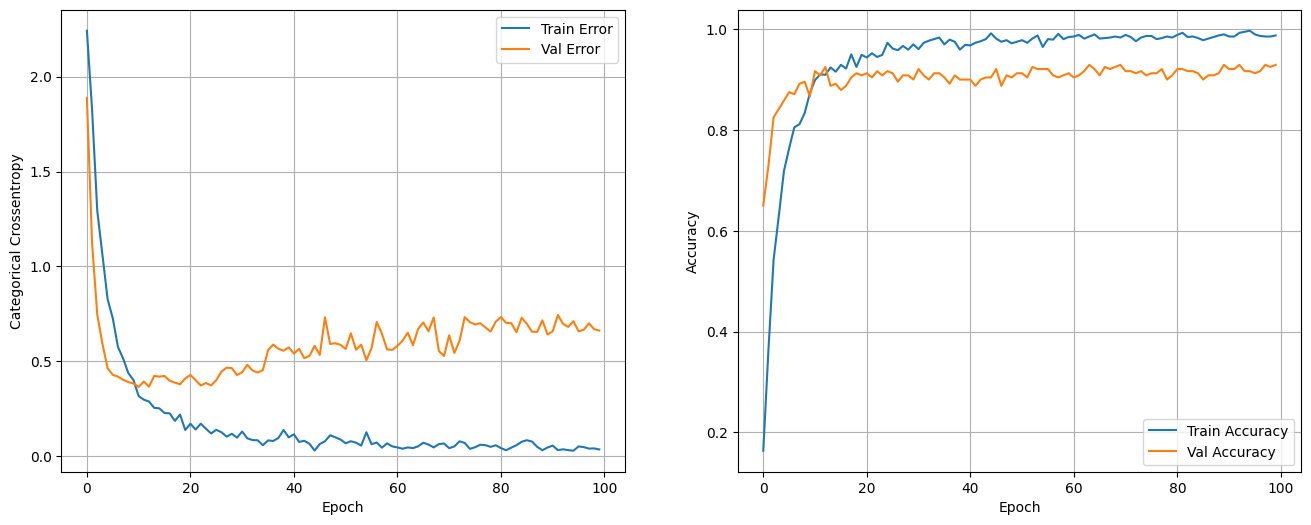

In [ ]:
show_loss_accuracy_evolution(history_dropout)

Este si que es un modelo que no sobreentrena. Pues ambas métricas están igualadas en ambos graficos y no mantiene el 100% de accuracy.

In [ ]:
results = model_droput.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.6781761050224304
Test Accuracy: 0.9110999703407288


#### Pregunta:

Que pasa si cambiamos el dropout de 0.1 a 0.9

##### Dropout 0.9

In [ ]:
dropout = 0.9

# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(dropout,name='dropout_l1')(l_1)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(dropout,name='dropout_l2')(l_2)

# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(dropout,name='dropout_l3')(l_3)


# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model_droput = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model_dropout')

In [ ]:
model_droput.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history_dropout = model_droput.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1274 - loss: 7.6573 - val_accuracy: 0.0708 - val_loss: 2.3032
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0967 - loss: 2.7776 - val_accuracy: 0.0667 - val_loss: 2.3032
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1010 - loss: 2.4746 - val_accuracy: 0.0625 - val_loss: 2.3033
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0875 - loss: 2.3602 - val_accuracy: 0.0583 - val_loss: 2.3036
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0913 - loss: 2.3320 - val_accuracy: 0.0583 - val_loss: 2.3035
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1011 - loss: 2.3350 - val_accuracy: 0.0583 - val_loss: 2.3039
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0885 - loss: 2.3607 - val_accuracy: 0.0708 - val_loss: 2.3039
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0795 - loss: 2.3074 - val_accuracy: 0.12

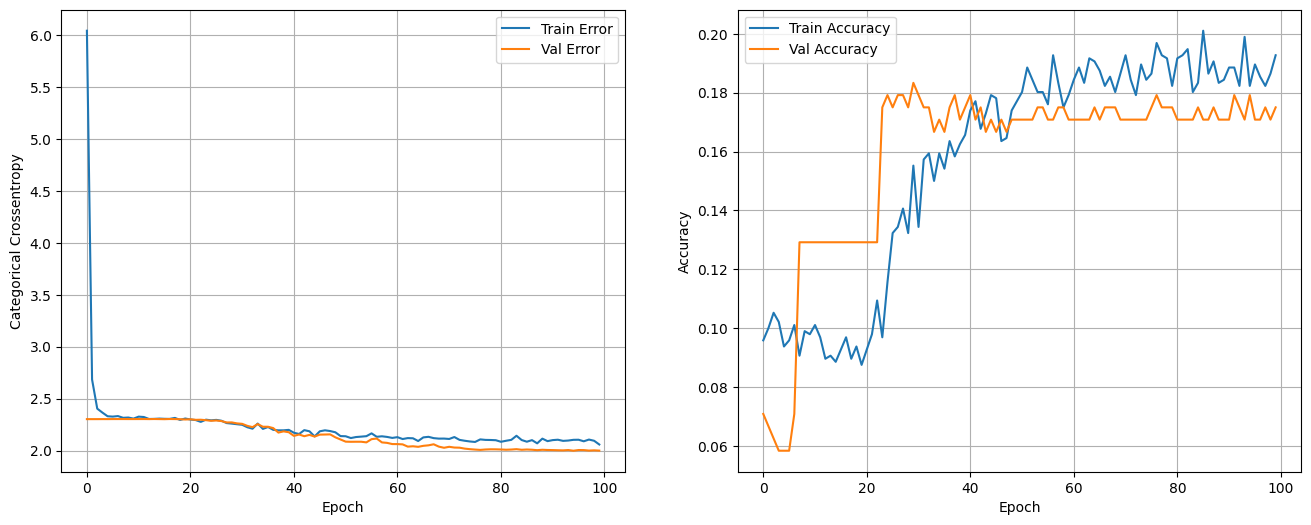

In [ ]:
show_loss_accuracy_evolution(history_dropout)

In [ ]:
results = model_droput.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 2.0082461833953857
Test Accuracy: 0.20649999380111694


##### Dropout 0.1

In [ ]:
dropout = 0.1

# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(dropout,name='dropout_l1')(l_1)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(dropout,name='dropout_l2')(l_2)

# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(dropout,name='dropout_l3')(l_3)


# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model_droput = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model_dropout')

In [ ]:
model_droput.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history_dropout = model_droput.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4017 - loss: 1.7494 - val_accuracy: 0.8417 - val_loss: 0.5643
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8188 - loss: 0.5713 - val_accuracy: 0.8917 - val_loss: 0.3935
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8947 - loss: 0.3463 - val_accuracy: 0.8917 - val_loss: 0.3607
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9350 - loss: 0.1795 - val_accuracy: 0.9000 - val_loss: 0.3888
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9626 - loss: 0.1324 - val_accuracy: 0.9000 - val_loss: 0.3684
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9708 - loss: 0.0981 - val_accuracy: 0.8958 - val_loss: 0.4032
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9756 - loss: 0.0814 - val_accuracy: 0.8875 - val_loss: 0.4379
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9923 - loss: 0.0360 - val_accuracy: 0.9000 -

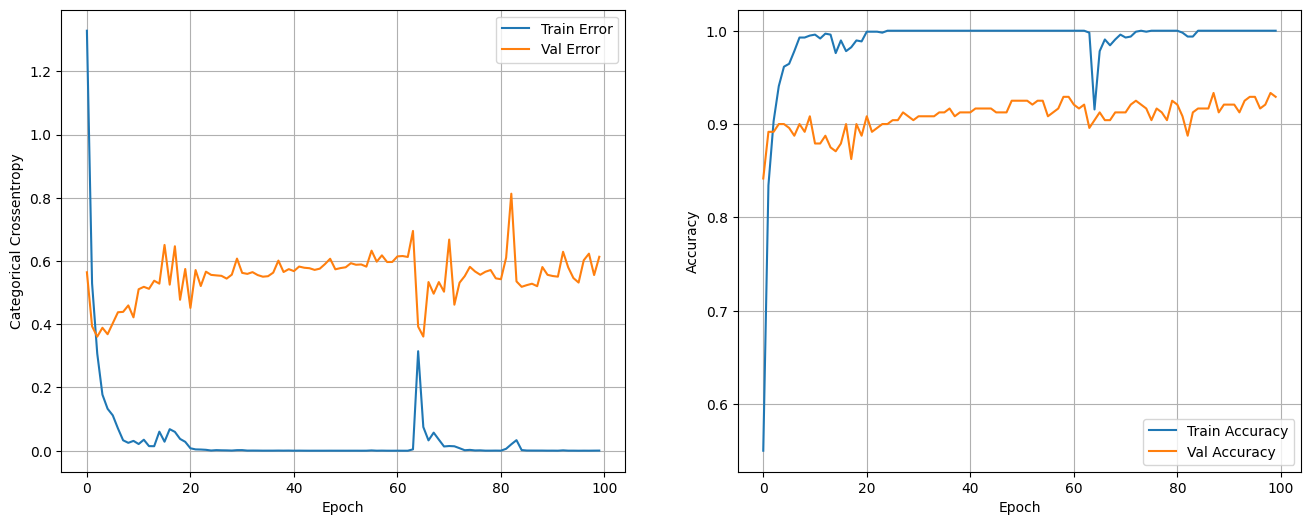

In [ ]:
show_loss_accuracy_evolution(history_dropout)


In [ ]:
results = model_droput.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.6619136929512024
Test Accuracy: 0.9132000207901001


El echo de poner un dropout tant alto, implica que nuestro modelo es muy poco complejo y al final nuestro modelo pierde accuracy. Si ponemos un dropout bajo el modelo tenderá a sobreentrenat.

### 4. Batch Normalization

El Batch Normalization aplica una transformación que mantienen la media del ouput cerca del 0 y la desviación estandard del outut cerca del 1.

Con Funcional API:

```python
next_layer = layers.BatchNormalization()(prev_layer)
```

y con Sequential
```python
model.add(layers.BatchNormalziation())
```

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.BatchNormalization()(l_1)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.BatchNormalization()(l_2)

# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model_batch_norm = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model_batch_norm')

In [ ]:
model_batch_norm.summary()

Model: "dont_overfit_model_batch_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,194 (989.04 KB)

 Trainable params: 252,426 (986.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
model_batch_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_batch_norm = model_batch_norm.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4526 - loss: 1.6960 - val_accuracy: 0.8417 - val_loss: 1.2659
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9114 - loss: 0.3141 - val_accuracy: 0.8833 - val_loss: 0.7776
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9965 - loss: 0.0909 - val_accuracy: 0.8875 - val_loss: 0.4891
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0282 - val_accuracy: 0.8958 - val_loss: 0.3817
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.9000 - val_loss: 0.3451
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9042 - val_loss: 0.3354
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9000 - val_loss: 0.3404
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9000 -

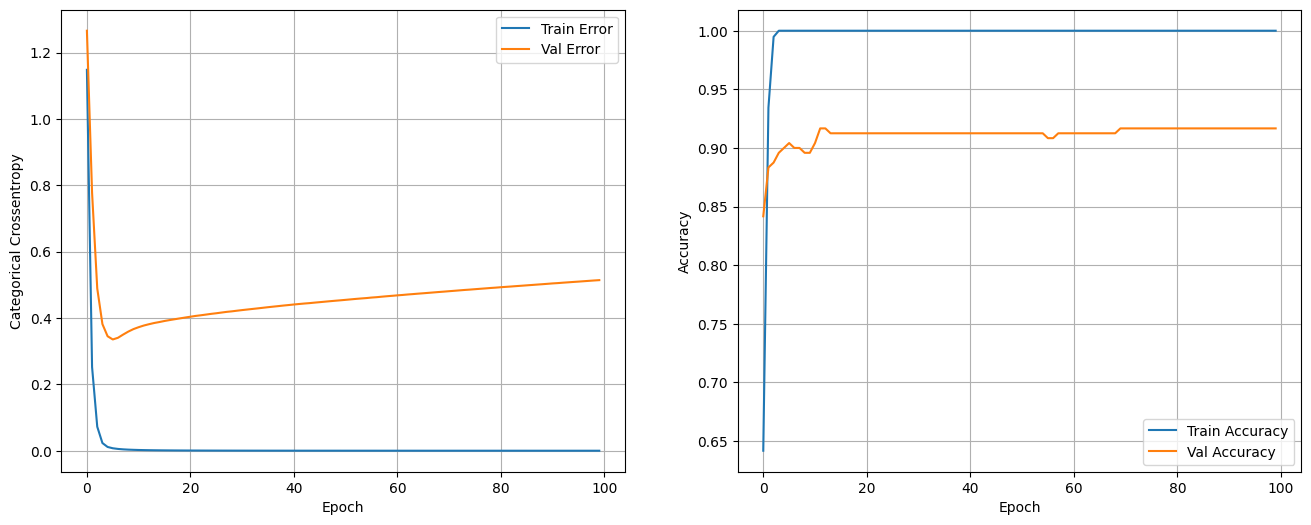

In [ ]:
show_loss_accuracy_evolution(history_batch_norm)

Este modelo es basntante malo, pues hay una distancia importante entre ambas metricas en cada uno de los graficos y el accuracy es un en pocos epochs. Por lo tanto, presenta un overfitting muy alto.

In [ ]:
results = model_batch_norm.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.4720728099346161
Test Accuracy: 0.8999999761581421


### 5. Layer Normalization

Layer Normalization es otra tencca de normalización. A diferencia de batch normalization, normalizao los datos alrededor de los parámetros y no depende del batch size, haciendolo efectivo para enternamiento el tiempo de interfencia en normalización.

Layer normalization computa la media y la varianza usado para la normalización desde todos los inputs sumados. Es aplicado elemento por elemento.

* Con Functional API

```python
next_layer = layers.LayerNormalizaction(axis=1)(prev_layer)
```
* Con Sequential
```python
model.add(layers.LayerNormalization(axis=1))
```


In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)
# Capa oculta 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.LayerNormalization(axis=1)(l_2)

# Capa oculta 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model_layer_norm = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model_layer_norm')

In [ ]:
model_layer_norm.summary()

Model: "dont_overfit_model_layer_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 256)            │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,426 (986.04 KB)

 Trainable params: 252,426 (986.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_layer_norm.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_layer_norm = model_layer_norm.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5022 - loss: 1.5157 - val_accuracy: 0.8750 - val_loss: 0.3896
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9268 - loss: 0.2601 - val_accuracy: 0.9167 - val_loss: 0.3023
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9935 - loss: 0.0766 - val_accuracy: 0.8958 - val_loss: 0.3109
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0356 - val_accuracy: 0.8958 - val_loss: 0.3478
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9935 - loss: 0.0267 - val_accuracy: 0.8875 - val_loss: 0.3850
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9994 - loss: 0.0166 - val_accuracy: 0.9042 - val_loss: 0.3378
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9000 - val_loss: 0.3507
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.9042 - 

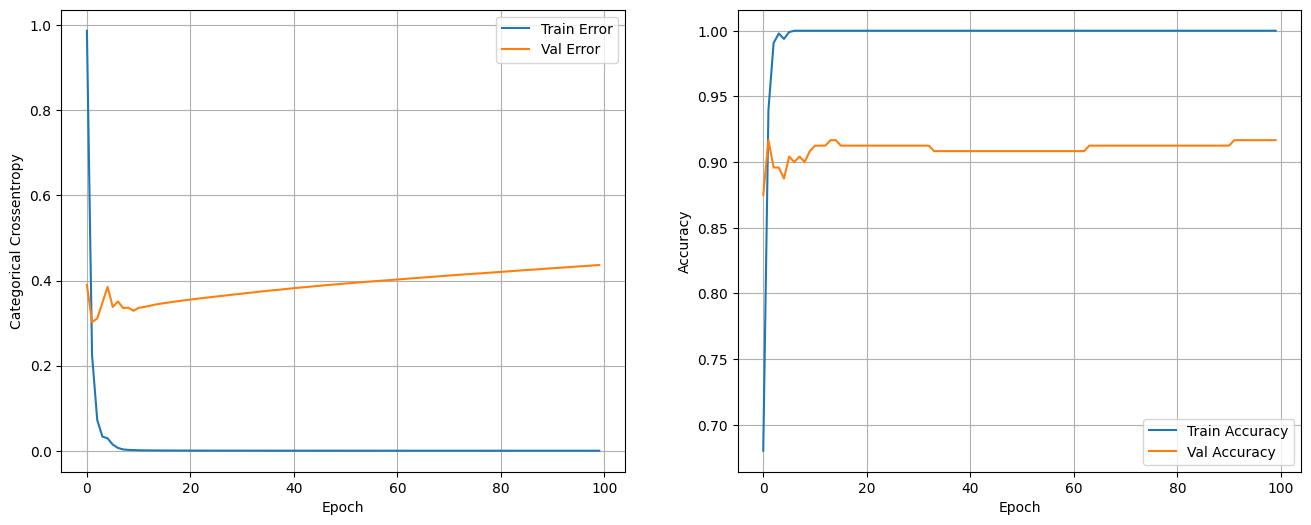

In [ ]:
show_loss_accuracy_evolution(history_layer_norm)

Vemos que el modelo sigue siendo malo. Existe presencia de overfitting

In [ ]:
results = model_layer_norm.evaluate(X_test,y_test,verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5012408494949341
Test Accuracy: 0.9099000096321106


### 6. L1, L2 y ElasticNet

Recordemos que durante el entrenamiento de la red se aprende la configuración de pesos y biases que permita mejorar los resultados para una determinada funcuón de pérdida.

* L1 regularization: donde el coste añadido es proporcional al valor absoluto de los pesos de los coeficientes

```python
tf.keras.regularizers.l1(l1=0.01)

layers.Dense(3, kernel_regularizer='l1')
```

* L2 regularization, donde el coste añadido es porporcional al cuadrado de los valores de los pesos de los coeficientes.

```python
tf.keras.regularizares.l2(l2=0.01)

layers.Dense(3,kernel_regularizer = 'l2')
```

* L1_L2 or Elastic Nrt.

``` python
tf.keras.regularizers.l1_l2(
  l1=0.01, l2=0.01
)
```

Además, es posible escoger si incluimos el coste de penalización en el coste de función de los pesos, las biases o en activation, con los siguientes argumentos:

* `kernel_regularizer`: solo en los pesos
* `bias_regularizer`: solo en biases
* `activity_regularizer`: en todo el ouput

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
kerner_regularizer_l1 = regularizers.l1_l2(l1=1e-5, l2=5e-4)
kerner_regularizer_l2 = regularizers.l2(5e-4)
kerner_regularizer_l3 = regularizers.l1(1e-5)



In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convertimos la imagen 2D en un vector
flat = layers.Flatten()(inputs)

# Capa oculta 1
l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l1, name='layer_1')(flat)

# Capa oculta 2
l_2 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_2')(l_1)
# Capa oculta 3
l_3 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l3, name='layer_3')(l_2)
# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model_regularizers = keras.Model(inputs = inputs, outputs=outputs, name='dont_overfit_model_regularizers')

In [ ]:
model_regularizers.summary()

Model: "dont_overfit_model_regularizers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_regularizers.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

In [ ]:
history_regularizers = model_regularizers.fit(
    X,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5004 - loss: 1.9488 - val_accuracy: 0.8458 - val_loss: 0.8188
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8668 - loss: 0.7174 - val_accuracy: 0.8542 - val_loss: 0.7882
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9243 - loss: 0.5131 - val_accuracy: 0.8917 - val_loss: 0.6745
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9581 - loss: 0.4096 - val_accuracy: 0.8917 - val_loss: 0.6735
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9849 - loss: 0.3456 - val_accuracy: 0.8875 - val_loss: 0.7226
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9904 - loss: 0.3045 - val_accuracy: 0.8792 - val_loss: 0.7271
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9914 - loss: 0.2918 - val_accuracy: 0.8875 - val_loss: 0.7788
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9908 - loss: 0.2808 - val_accuracy: 0.